# **Importing libraries**

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from warnings import filterwarnings
filterwarnings('ignore')

# **loading Data**

In [2]:
data = pd.read_csv('../input/drug-classification/drug200.csv')

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# **finding NAN values**

In [4]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


**there is no missing values in the date**</br>
**we have 6 coulmns**</br>
**and 200 rows**

# **data Visualization**

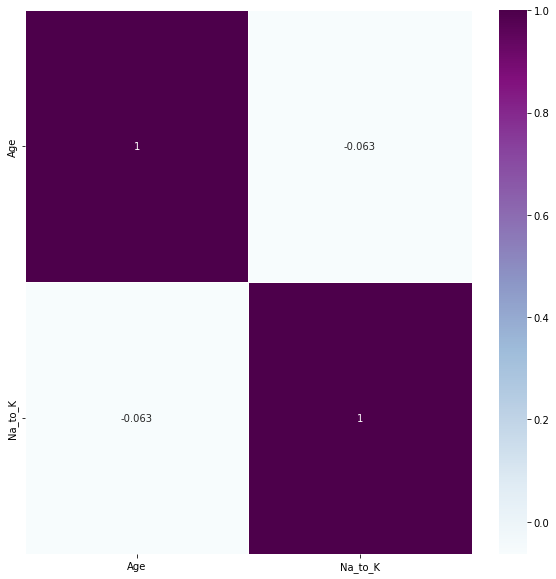

In [6]:
fig, ax = plt.subplots(figsize  = (10, 10))
sns.heatmap(data.corr(), cmap = 'BuPu', cbar = True, linewidth = 0.5, annot = True, ax = ax)
plt.show()

**discover numbers of drug for each type and display it**

In [7]:
data['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='count'>

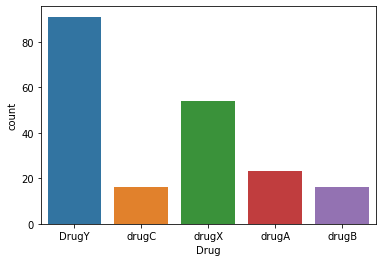

In [8]:
sns.countplot(x = 'Drug', data= data)

**Discover Number of females and males in data**

In [9]:
data['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

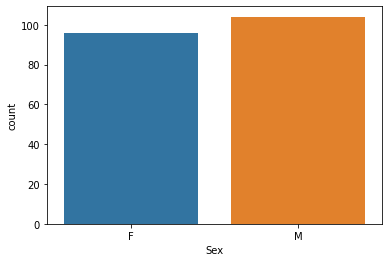

In [10]:
sns.countplot(x = 'Sex', data= data)

**Number of High, Low and Normal BP in the data**

In [11]:
data['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

<AxesSubplot:xlabel='BP', ylabel='count'>

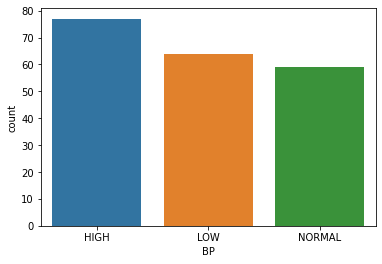

In [12]:
sns.countplot(x = 'BP', data= data)

**Number of High and Normal Cholesterol in the data**

In [13]:
data['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

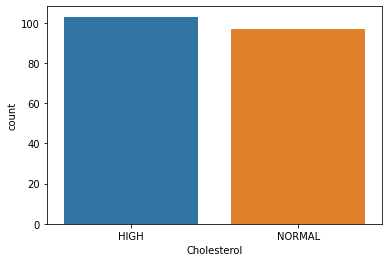

In [14]:
sns.countplot(x = 'Cholesterol', data= data)

In [15]:
data['Na_to_K'].describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

<AxesSubplot:ylabel='Density'>

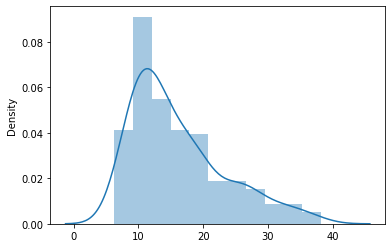

In [16]:
sns.distplot(x = data['Na_to_K'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

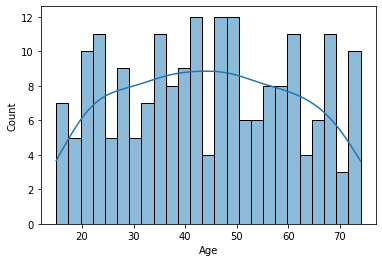

In [17]:
sns.histplot(x = 'Age', kde=True, bins = 25, data = data)

<AxesSubplot:xlabel='Age', ylabel='Na_to_K'>

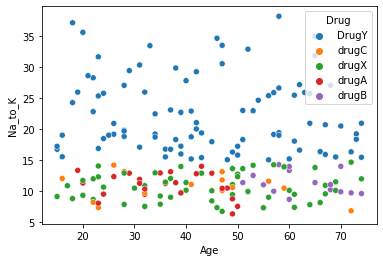

In [18]:
sns.scatterplot(x = 'Age', y = 'Na_to_K', data = data, hue = 'Drug')

**In the last fig we find all the items have more than 15 Na_to_K have DrugY type**

**In the next**</br>
**We will find out the number of each Drug type per Sex**

In [19]:
data_sex_drug = data.groupby(['Drug','Sex']).size().reset_index(name = 'count')
print(data_sex_drug)

    Drug Sex  count
0  DrugY   F     47
1  DrugY   M     44
2  drugA   F      9
3  drugA   M     14
4  drugB   F      6
5  drugB   M     10
6  drugC   F      7
7  drugC   M      9
8  drugX   F     27
9  drugX   M     27


<AxesSubplot:xlabel='Drug', ylabel='count'>

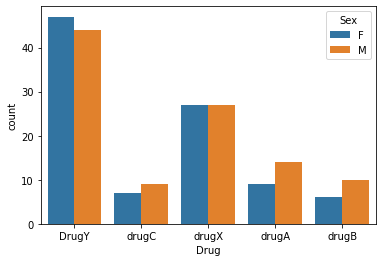

In [20]:
sns.countplot(x = 'Drug', data= data, hue = 'Sex')

**We will find out the number of each Drug type per BP**

In [21]:
data_BP_drug = data.groupby(['Drug','BP']).size().reset_index(name = 'count')
print(data_BP_drug)

    Drug      BP  count
0  DrugY    HIGH     38
1  DrugY     LOW     30
2  DrugY  NORMAL     23
3  drugA    HIGH     23
4  drugB    HIGH     16
5  drugC     LOW     16
6  drugX     LOW     18
7  drugX  NORMAL     36


<AxesSubplot:xlabel='Drug', ylabel='count'>

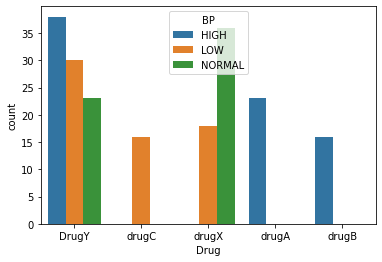

In [22]:
sns.countplot(x = 'Drug', data= data, hue = 'BP')

**We will find out the number of each drug type per Cholesterol**

In [23]:
data_Cholesterol_drug = data.groupby(['Drug','Cholesterol']).size().reset_index(name = 'count')
print(data_Cholesterol_drug)

    Drug Cholesterol  count
0  DrugY        HIGH     47
1  DrugY      NORMAL     44
2  drugA        HIGH     12
3  drugA      NORMAL     11
4  drugB        HIGH      8
5  drugB      NORMAL      8
6  drugC        HIGH     16
7  drugX        HIGH     20
8  drugX      NORMAL     34


<AxesSubplot:xlabel='Drug', ylabel='count'>

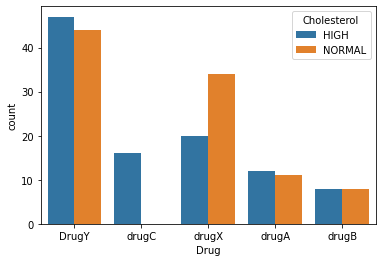

In [24]:
sns.countplot(x = 'Drug', data= data, hue = 'Cholesterol')

# **Dummy variables**
**Convert categorical variables into dummy**

**We will use map operation for Sex coulmn, Cholesterol and Drug coulmns**</br>
**map used in Sex coulmn becouse it has only two values (F, M) so it can be converted into (0 , 1)**</br>
**map used in Cholesterol coulmn becouse it has only two values (HIGH, NORMAL) so it can be converted into (0 , 1)**</br>
**map used in Drug coulmn becouse it is target coulmn**</br>

In [25]:
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})
data['Cholesterol'] = data['Cholesterol'].map({'HIGH' : 1, 'NORMAL' : 0})
data['Drug'] = data['Drug'].map({'DrugY':1, 'drugC':2, 'drugX':3, 'drugA':4, 'drugB':5})
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,1,25.355,1
1,47,1,LOW,1,13.093,2
2,47,1,LOW,1,10.114,2
3,28,0,NORMAL,1,7.798,3
4,61,0,LOW,1,18.043,1


In [26]:
data.shape

(200, 6)

**the we will used get_dummies function in pandas for other categorical variables in the data**

In [27]:
data = pd.get_dummies(data)
data.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL
0,23,0,1,25.355,1,1,0,0
1,47,1,1,13.093,2,0,1,0
2,47,1,1,10.114,2,0,1,0
3,28,0,1,7.798,3,0,0,1
4,61,0,1,18.043,1,0,1,0


In [28]:
data.shape

(200, 8)

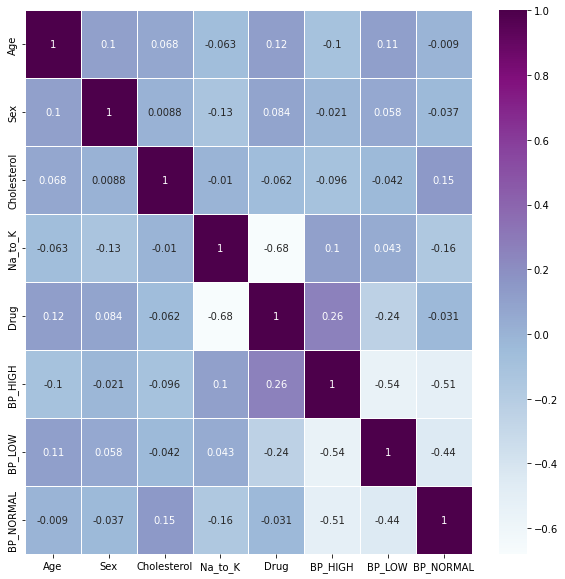

In [29]:
fig, ax = plt.subplots(figsize  = (10, 10))
sns.heatmap(data.corr(), cmap = 'BuPu', cbar = True, linewidth = 0.5, annot = True, ax = ax)
plt.show()

In [30]:
X = data.drop('Drug', axis = 1).values
y = data['Drug'].values.reshape((-1,1))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print('x train shape {}'.format(X_train.shape))
print('x test shape  {}'.format(X_test.shape))
print('y train shape {}'.format(y_train.shape))
print('y test shape  {}'.format(y_test.shape))

x train shape (160, 7)
x test shape  (40, 7)
y train shape (160, 1)
y test shape  (40, 1)


# **Logistic Regression**

In [32]:
logistic_model = LogisticRegression(C = 2 ,solver = 'liblinear', tol = .001)

In [33]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(logistic_model.score(X_train,y_train)*100)
logistic_score = accuracy_score(y_test, y_pred)
print(logistic_score*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

97.5
95.0
[[17  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0 13  0  0]
 [ 1  0  0  2  1]
 [ 0  0  0  0  2]]
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        13
           4       1.00      0.50      0.67         4
           5       0.67      1.00      0.80         2

    accuracy                           0.95        40
   macro avg       0.92      0.90      0.89        40
weighted avg       0.96      0.95      0.94        40



# **KNN classifier**

In [34]:
KNN_class = KNeighborsClassifier(n_neighbors = 3)

In [35]:
KNN_class.fit(X_train, y_train)
y_pred = KNN_class.predict(X_test)
print(logistic_model.score(X_train,y_train)*100)
KNN_score = accuracy_score(y_test, y_pred)
print(KNN_score*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

97.5
70.0
[[16  0  0  0  1]
 [ 0  2  0  0  2]
 [ 0  3  6  2  2]
 [ 1  1  0  2  0]
 [ 0  0  0  0  2]]
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        17
           2       0.33      0.50      0.40         4
           3       1.00      0.46      0.63        13
           4       0.50      0.50      0.50         4
           5       0.29      1.00      0.44         2

    accuracy                           0.70        40
   macro avg       0.61      0.68      0.58        40
weighted avg       0.82      0.70      0.72        40



# **SVM classifier**

In [36]:
SVC_class = SVC(C = 0.5, kernel = 'linear')

In [37]:
SVC_class.fit(X_train,y_train)
y_pred = SVC_class.predict(X_test)
print(SVC_class.score(X_train,y_train)*100)
SVC_score = accuracy_score(y_test, y_pred)
print(SVC_score*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

100.0
100.0
[[17  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# **Decision Tree Classifier**

In [38]:
tree_class = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, splitter = 'best', random_state = 1)

In [39]:
tree_class.fit(X_train, y_train)
y_pred = tree_class.predict(X_test)
print(tree_class.score(X_train,y_train)*100)
tree_score = accuracy_score(y_test, y_pred)
print(tree_score*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

100.0
100.0
[[17  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# **Random Forest Classifier**

In [40]:
Random_class = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=4, random_state = 1)

In [41]:
Random_class.fit(X_train, y_train)
y_pred = Random_class.predict(X_test)
print(Random_class.score(X_train,y_train)*100)
Forest_score = accuracy_score(y_test, y_pred)
print(Forest_score*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

100.0
100.0
[[17  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# **scaler data**

In [42]:
poly_feat = PolynomialFeatures()

In [43]:
X_poly_train = poly_feat.fit_transform(X_train)
X_poly_test = poly_feat.fit_transform(X_test)

# **Logistic regrassion after scaler**

In [44]:
logistic_model_2 = LogisticRegression(solver = 'liblinear')

In [45]:
logistic_model_2.fit(X_poly_train,y_train)
y_pred = logistic_model_2.predict(X_poly_test)
print(logistic_model_2.score(X_poly_train,y_train)*100)
second_logistic_score = accuracy_score(y_test, y_pred)
print(SVC_score*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

100.0
100.0
[[17  0  0  0  0]
 [ 0  4  0  0  0]
 [ 1  0 12  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  2]]
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00         4
           3       1.00      0.92      0.96        13
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



# **accurecy fig**
**We will built a fig for the algorithms accurecy which are used**

In [46]:
x = ['logistic_score', 'KNN_score', 'SVC_score', 'tree_score', 'Forest_score', 'second_logistic_score']
y = [logistic_score, KNN_score, SVC_score, tree_score, Forest_score, second_logistic_score]

Text(0.5, 1.03, 'Model Comparison - Model Accuracy')

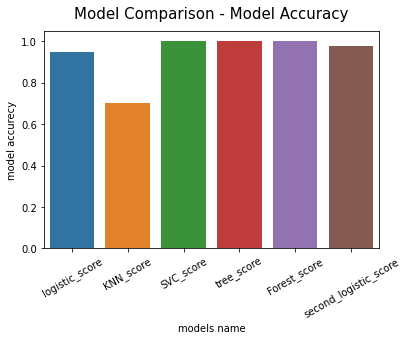

In [47]:
sns.barplot(x = x, y = y)
plt.ylabel('model accurecy')
plt.xlabel('models name')
plt.xticks(rotation = 30)
plt.title("Model Comparison - Model Accuracy", fontsize=15, fontname="Helvetica", y=1.03)